In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_csv('townhall_data.csv')
df['CommentDateTime'] = pd.to_datetime(df['CommentDateTime'])
df.sample(10)

,CommenterName,CommentTitle,Comment,CommentID,CommentDateTime,CommentLink
42045,Anonymous,Glenn Youngkin Is A Bot,"This will hurt kids. Don't be mean, Youngkin!",171194.0,2022-09-28 20:14:00,https://townhall.virginia.gov/ViewComments.cfm...
19269,Jacob,This poilcy is anti-Christian,Jesus is watching.,148338.0,2022-09-27 15:58:00,https://townhall.virginia.gov/ViewComments.cfm...
47011,Anonymous,Strongly Oppose,"This will hurt kids. Don't be mean, Youngkin!",176163.0,2022-09-28 20:25:00,https://townhall.virginia.gov/ViewComments.cfm...
22742,LCRC member,Parents rights,Parents should not be kept in the dark about t...,151838.0,2022-09-27 21:44:00,https://townhall.virginia.gov/ViewComments.cfm...
18996,Anonymous,Oppose!!! 110% oppose,Our children are hurting ENOUGH right now. For...,148056.0,2022-09-27 15:27:00,https://townhall.virginia.gov/ViewComments.cfm...
28252,Anonymous,VOTE HIM OUT,This is cruel to our children,157363.0,2022-09-28 10:15:00,https://townhall.virginia.gov/ViewComments.cfm...
7066,Breon Aardema,Strongly oppose.,Strongly oppose.,136036.0,2022-09-26 16:15:00,https://townhall.virginia.gov/ViewComments.cfm...
3727,Angelina Reinecke,It is a grave mistake to pass this.,It is a grave mistake to pass this.,132678.0,2022-09-26 14:23:00,https://townhall.virginia.gov/ViewComments.cfm...
14403,Frieda Madis,This will bring harm to trans kids.,This will bring harm to trans kids.,143408.0,2022-09-26 22:38:00,https://townhall.virginia.gov/ViewComments.cfm...
50580,Anonymous,Why would you puts students lives at risk? Str...,Requiring schools to reveal sexual identity to...,179732.0,2022-09-29 00:35:00,https://townhall.virginia.gov/ViewComments.cfm...


In [15]:
df_to_plot = df.groupby(pd.Grouper(key='CommentDateTime', freq='1D')).count().reset_index()
df_to_plot

,CommentDateTime,CommenterName,CommentTitle,Comment,CommentID,CommentLink
0,2022-09-26,14882,14883,14585,14781,14883
1,2022-09-27,8964,8969,8817,8886,8969
2,2022-09-28,26703,26703,26656,26628,26703
3,2022-09-29,1345,1345,1340,1328,1345


<AxesSubplot:xlabel='CommentDateTime', ylabel='Comment'>

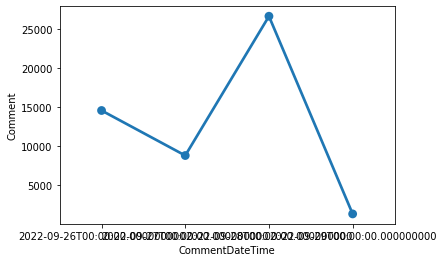

In [17]:
sns.pointplot(data=df_to_plot, x='CommentDateTime', y='Comment')